In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
import datetime as dt

In [4]:
# reflect an existing database into a new model
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
#default of Reflect is True. 
Base.prepare(autoload_with=engine)

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [ ]:
# reflect the tables
# Collect the names of the tables within the database
inspector.get_table_names()

['measurement', 'station']

In [ ]:
# View all of the classes that automap found. 
Base.classes.keys()

['measurement', 'station']

In [ ]:
# Save references to each table
# Assign the station class to a variable called `Station`
Station= Base.classes.station

In [ ]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [ ]:
# Create our session (link) from Python to the DB
# The bind does not need to be noted in code. 
session = Session(bind=engine)

In [ ]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.
#this also works with same result: recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = session.query(func.max(Measurement.date)).all()
recent_date


[('2017-08-23',)]

In [ ]:
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago_date  

datetime.date(2016, 8, 23)

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# prcp_twelve_mos = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date.desc()).all()
# prcp_twelve_mos
prcp_twelve_mos = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago_date).order_by(Measurement.date.desc()).all()
prcp_twelve_mos

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [ ]:
# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago_date  


datetime.date(2016, 8, 23)

In [ ]:
# Perform a query to retrieve the data and precipitation scores
prcp_date = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= year_ago_date).\
                    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_date, columns=['date','precipitation'])
print(prcp_df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
3     2016-08-23            NaN
4     2016-08-23           0.02
...          ...            ...
2225  2017-08-22           0.50
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2228  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [ ]:
# Sort the dataframe by date
prcp_df.sort_values('date')
prcp_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [ ]:
prcp_df['date'] = pd.to_datetime(prcp_df['date']) 
prcp_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


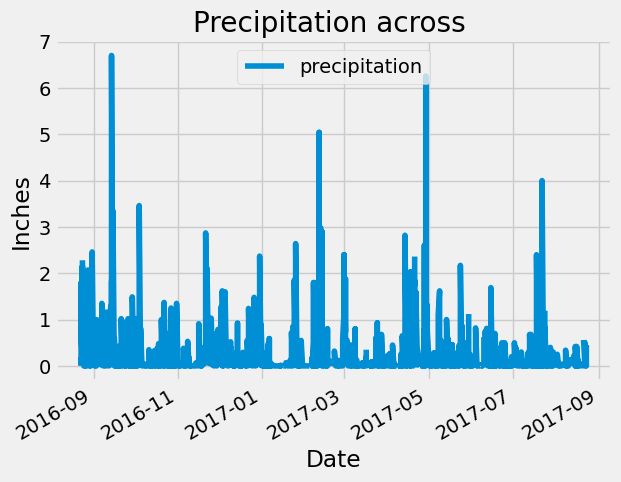

In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='precipitation')
plt.tight_layout()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.title('Precipitation across ')
plt.legend(loc='upper center')
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
station_total = session.query(func.count(Station.station)).all()
station_total

[(9,)]

In [ ]:
#this works also for total number of stations in the dataset.
station_count = session.query(Station).count()
print(station_count)

9


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_list = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station

('USC00519281', 2772)

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Lowest temp of most active station
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").scalar()
print(lowest_temp)


54.0


In [ ]:
# highest temp of most active station
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").scalar()
print(highest_temp)

85.0


In [ ]:
# average temp of most active station
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").scalar()
print(avg_temp)

71.66378066378067


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp_12_mos = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date.desc()).all()
most_active_temp_12_mos

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [ ]:
#create a dataframe
temp_df= pd.DataFrame(most_active_temp_12_mos, columns=['date','tobs'])
temp_df

,date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
347,2016-08-27,75.0
348,2016-08-26,80.0
349,2016-08-25,80.0
350,2016-08-24,77.0


In [ ]:
#rename columns, and sort data
temp_df = temp_df.rename(columns = {'date':'Date','tobs': 'Temperature'})
temp_df

,Date,Temperature
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
347,2016-08-27,75.0
348,2016-08-26,80.0
349,2016-08-25,80.0
350,2016-08-24,77.0


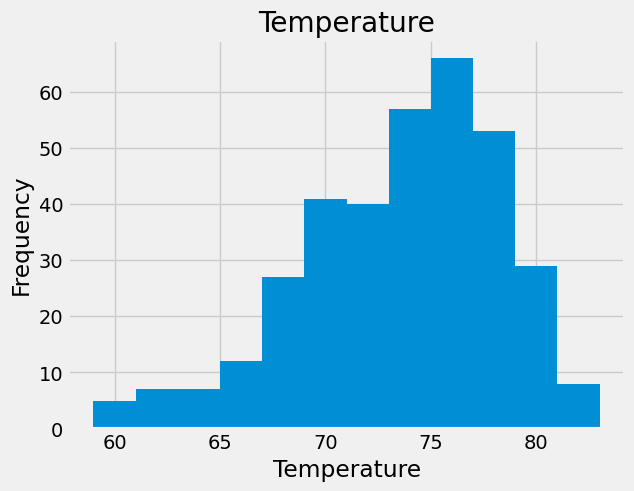

In [ ]:
#plot the results as a histogram
hist = temp_df.hist(bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()